# **🩺 Diabetes Prediction with Logistic Regression**

Have you ever wondered how doctors might use data to assess a patient’s health risks? Behind the scenes, machine learning models can help.

In this project, we’ll train a Logistic Regression model to predict whether a person is likely to have diabetes based on key health features, including: <br> <br>

* 🧬 Number of Pregnancies

* 🩸 Glucose Level

* 💉 Blood Pressure

* 🫀 Skin Thickness
* 💉 Insulin

* ⚖️ Body Mass Index (BMI)

* 📊 Diabetes Pedigree Function (family history risk)

* 🎂 Age

<br>
💡 Real-world applications:

Doctors can use data-driven models to support early diagnosis of diabetes.

Patients can understand their personal risk and take preventive measures.

Public health organizations can identify at-risk populations and allocate resources more effectively.

<br> <br>

# Step 1: Get the Dataset
Before we start coding, we need to download the dataset we'll use for our diabetes diagnosis predictions.

* This command will download the file **`diabetes.csv`** onto your Colab environment.
* You only need to run this **once** at the start of the notebook.
* After running it, you should see the dataset file appear in your Colab file explorer (on the left side).


In [ ]:
# @title **Run to fetch diabetes.csv**
!wget --no-check-certificate \
  'https://drive.google.com/uc?export=download&id=1HsqKhf94v4IfESRmgHZRpBLb-qQVbu35' \
  -O diabetes.csv


--2025-09-14 16:14:05--  https://drive.google.com/uc?export=download&id=1HsqKhf94v4IfESRmgHZRpBLb-qQVbu35
Resolving drive.google.com (drive.google.com)... 74.125.202.100, 74.125.202.101, 74.125.202.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1HsqKhf94v4IfESRmgHZRpBLb-qQVbu35&export=download [following]
--2025-09-14 16:14:05--  https://drive.usercontent.google.com/download?id=1HsqKhf94v4IfESRmgHZRpBLb-qQVbu35&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.69.132, 2607:f8b0:4001:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [application/octet-stream]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 

## Step 2: Import Libraries

We’ll import Python libraries for:
- `pandas` & `numpy` → data handling  
- `matplotlib` & `seaborn` → plots and visualizations  
- `sklearn` → logistic regression and evaluation metrics  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Step 3: Explore the Dataset
We are using the **Pima Indians Diabetes Dataset**.  
Each row = a patient’s health information (like glucose, blood pressure, BMI).  
The column `Outcome` is the target:
- `1` → diabetic  
- `0` → not diabetic  

In [ ]:
# Loads the dataset from a CSV file into a pandas DataFrame
# A DataFrame is like a table or spreadsheet in Python - it has columns and rows representing our data
# Pro tip: df means DataFrame

df = pd.read_csv('diabetes.csv')

# Prints the first couple of rows of the dataset to quickly inspect its contents
print('first 5 rows: ')
print(df.head())

# Prints a summary of the dataset, including column names, data types, and non-null counts
print('deteset info:')
print(df.info())

first 5 rows: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
deteset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

## Step 4: Features and Target
- **X (features):** all patient information except `Outcome`  
- **y (target):** the `Outcome` column  

In [ ]:
# X = all the input features (everything except the target column, OR THE COLUMN WITH WHAT WE WANT TO PREDICT)
# df.drop("Outcome", axis=1) means: remove the "Outcome" column from df
# axis=1 tells pandas we are dropping a column (axis=0 would mean dropping a row)
X = df.drop('outcome', axis=1)


# y = the target/output we want to predict
# df["House_Price"] selects only the "House_Price" column from the DataFrame
y = df['outcome']


## Step 5: Train-Test Split
We split the dataset into:
- **Training set (80%)** → used to train the model  
- **Test set (20%)** → used to check accuracy on unseen data  

In [ ]:
# Split the dataset into training and testing sets, so the model has something to learn from and then something to test its knowledge on
# X = input features, y = target values
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures the split is the same every time we run the code. 42 CAN BE REPLACED WITH ANY NUMBER!
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Standardize Features
Logistic regression works best when features are on the same scale.  
We use **StandardScaler** to make all features have mean = 0 and std = 1.  

In [ ]:
# Standardize features (important for logistic regression)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Step 7: Train Logistic Regression
We now train the logistic regression model on the training data.  

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Step 8: Make Predictions
We predict outcomes for patients in the test set.

In [ ]:
# Predictions on test set
y_pred = model.predict(x_test)

## Step 9: Example Prediction
Let’s test the model on one patient’s data and see the predicted probability of diabetes.  

In [ ]:
example = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Scale the features
example_scaled = scaler.transform(example)

# Get the probabilities of each class
example_scaled = model.predict_proba(example) # Use the scaled example for prediction

# Get the predicted class (0 = Non-diabetic, 1 = Diabetic)
prediction = model.predict(example) # Use the scaled example for prediction

# Decide label using if statement
if prediction[0] == 1:
    predicted_label = "Diabetic"
else:
    predicted_label = "Non-diabetic"

# Show results
print("Probability of being Non-diabetic:", probabilities[0][0])
print("Probability of being Diabetic:", probabilities[0][1])
print("Predicted class:", predicted_label)

Probability of being Non-diabetic: 0.22900154448289733
Probability of being Diabetic: 0.7709984555171027
Predicted class: Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Step 10: Confusion Matrix Heatmap
Visual representation of correct vs. incorrect predictions.  

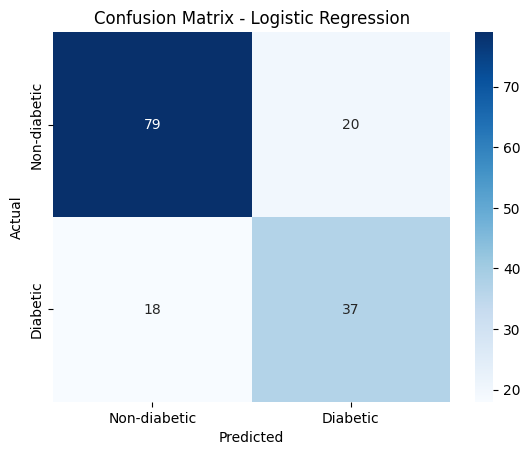

In [ ]:
# Create the confusion matrix: compares actual labels with predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(
    cm,               # The confusion matrix data
    annot=True,       # Show numbers on each cell
    fmt="d",          # Format numbers as integers
    cmap="Blues",     # Color map (blue shades)
    xticklabels=["Non-diabetic", "Diabetic"],  # Labels for predicted classes
    yticklabels=["Non-diabetic", "Diabetic"]   # Labels for actual classes
)

# Label the x-axis
plt.xlabel("Predicted")

# Label the y-axis
plt.ylabel("Actual")

# Add a title to the plot
plt.title("Confusion Matrix - Logistic Regression")

# Display the plot
plt.show()